In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max.columns',None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, balanced_accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [2]:
import shap

In [3]:
train_data = pd.read_csv("train_set_feature_engineering.csv")
valid_data = pd.read_csv("valid_set_feature_engineering.csv")

# Model building

In [13]:
# Version with all columns
X_train = train_data.drop('FINALIZED_LOAN', axis=1)

y_train = train_data['FINALIZED_LOAN']

X_test = valid_data.drop('FINALIZED_LOAN', axis =1 )

y_test = valid_data['FINALIZED_LOAN']

1. Support vector machine

In [4]:
# Initialize models
svm_model = SVC(kernel='linear', C=1)


# Fit models
svm_model.fit(X_train, y_train)


# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)


# Calculate accuracies
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
gini_svm = 2 * roc_auc_score(y_test, y_pred_svm) - 1



accuracy_svm, recall_svm, gini_svm

(0.8590979782270607, 0.4305835010060362, 0.36803751130772855)

2. K Nearest Neighbours

In [5]:
# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=5)


# Fit models
knn_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracies
accuracy_knn = balanced_accuracy_score(y_test, y_pred_knn)

recall_knn = recall_score(y_test, y_pred_knn)

gini_knn = 2 * roc_auc_score(y_test, y_pred_knn) - 1



accuracy_knn, recall_knn, gini_knn

(0.6191782779088068, 0.29979879275653926, 0.23835655581761372)

3. Gradient Boosting

In [6]:
# Initialize models
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Fit models
gbm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate accuracies
accuracy_gbm = balanced_accuracy_score(y_test, y_pred_gbm)

recall_gbm = recall_score(y_test, y_pred_gbm)

gini_gbm = 2 * roc_auc_score(y_test, y_pred_gbm) - 1



accuracy_gbm, recall_gbm, gini_gbm

(0.7316589011626788, 0.5291750503018109, 0.4633178023253577)

4. Gaussian naive bayes

In [7]:
# Initialize models
nb_model = GaussianNB()

# Fit models
nb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracies
accuracy_nb = balanced_accuracy_score(y_test, y_pred_nb)

recall_nb = recall_score(y_test, y_pred_nb)

gini_nb = 2 * roc_auc_score(y_test, y_pred_nb) - 1



accuracy_nb, recall_nb, gini_nb

(0.8100038790506098, 0.7947686116700201, 0.6200077581012196)

5. Multi-layer Perceptron (neural network)

In [8]:
# Initialize models
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

# Calculate accuracies
accuracy_nn = balanced_accuracy_score(y_test, y_pred_nn)

recall_nn = recall_score(y_test, y_pred_nn)

gini_nn = 2 * roc_auc_score(y_test, y_pred_nn) - 1

accuracy_nn, recall_nn, gini_nn

(0.8385526551509201, 0.9114688128772636, 0.6771053103018403)

6. Random Forest

In [9]:
# Re-initialize and train the model with correct data
rf_classifier_corrected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_corrected.fit(X_train, y_train)

# Predict on the corrected test set
y_pred_rf = rf_classifier_corrected.predict(X_test)

# Re-evaluate the model with corrected data
accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

recall_rf = recall_score(y_test, y_pred_rf)

gini_rf = 2 * roc_auc_score(y_test, y_pred_rf) - 1

accuracy_rf, recall_rf, gini_rf

(0.7508309607460806, 0.5472837022132797, 0.5016619214921614)

# Insights

It seems that in terms of recall and gini the best model is Gaussian Naive Bayes. Let's how these statistics will change when we choose only subset of columns. Let's choose these the most important ones according to previous analysis.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, roc_auc_score
from itertools import chain, combinations

# Function to get all subsets of a list
def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1)))

# Column names to consider for the model
columns_to_consider = [
    'LENGTH_RELATIONSHIP_WITH_CLIENT', 'LOYALTY_TO_AGE', 'SENIORITY_RELATIONSHIP_RATIO',
    'RELATIONSHIP_LENGTH_CAT', 'INCOME_AGE_INTERACTION', 'INCOME_SENIORITY_INTERACTION',
    'INCOME_LOG', 'AGE', 'INCOME', 'CAREER_STABILITY_RATIO', 
]

# Split the dataset into features (X) and target (y)
X_train = train_data.drop('FINALIZED_LOAN', axis=1)
y_train = train_data['FINALIZED_LOAN']

# Initialize an empty list to store the results
results = []

# Iterate over all subsets of the specified columns
for subset in all_subsets(columns_to_consider):
    # Convert subset to list to index dataframe
    subset_list = list(subset)

    # Train a GaussianNB model on the subset
    nb_model = GaussianNB()
    nb_model.fit(X_train[subset_list], y_train)

    # Predict on the valid set
    y_pred_nb = nb_model.predict(X_test[subset_list])

    # Calculate metrics
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    recall_nb = recall_score(y_test, y_pred_nb)
    gini_nb = 2 * roc_auc_score(y_test, y_pred_nb) - 1

    # Append the results
    results.append({
        'Columns': subset_list,
        'Accuracy': accuracy_nb,
        'Gini': gini_nb,
        'Recall': recall_nb
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

results_df

,Columns,Accuracy,Gini,Recall
0,[LENGTH_RELATIONSHIP_WITH_CLIENT],0.815552,0.402025,0.535211
1,[LOYALTY_TO_AGE],0.804977,0.111654,0.195171
2,[SENIORITY_RELATIONSHIP_RATIO],0.845412,0.000000,0.000000
3,[RELATIONSHIP_LENGTH_CAT],0.814930,0.402933,0.537223
4,[INCOME_AGE_INTERACTION],0.845412,0.000000,0.000000
...,...,...,...,...
1018,"[LENGTH_RELATIONSHIP_WITH_CLIENT, LOYALTY_TO_A...",0.809642,0.687694,0.893360
1019,"[LENGTH_RELATIONSHIP_WITH_CLIENT, LOYALTY_TO_A...",0.819285,0.664572,0.851107
1020,"[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.817107,0.704745,0.903421
1021,"[LOYALTY_TO_AGE, SENIORITY_RELATIONSHIP_RATIO,...",0.805288,0.680899,0.891348


In [11]:
results_df = results_df.sort_values(by='Gini', ascending=False)
results_df


,Columns,Accuracy,Gini,Recall
908,"[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.814930,0.712035,0.915493
907,"[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.818040,0.709137,0.907445
906,"[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.814619,0.708378,0.911469
710,"[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.814308,0.708010,0.911469
970,"[LENGTH_RELATIONSHIP_WITH_CLIENT, LOYALTY_TO_A...",0.805910,0.707942,0.923541
...,...,...,...,...
47,"[INCOME_SENIORITY_INTERACTION, INCOME]",0.845412,0.000000,0.000000
157,"[INCOME_AGE_INTERACTION, INCOME_SENIORITY_INTE...",0.845412,0.000000,0.000000
49,"[INCOME_LOG, AGE]",0.845412,0.000000,0.000000
50,"[INCOME_LOG, INCOME]",0.845412,0.000000,0.000000


In [12]:
top_columns = results_df.iloc[0]['Columns']
top_columns

['LENGTH_RELATIONSHIP_WITH_CLIENT',
 'SENIORITY_RELATIONSHIP_RATIO',
 'RELATIONSHIP_LENGTH_CAT',
 'INCOME_AGE_INTERACTION',
 'INCOME_SENIORITY_INTERACTION',
 'INCOME',
 'CAREER_STABILITY_RATIO']

In [48]:
# Base set of columns that we've decided to keep
base_columns = ['LENGTH_RELATIONSHIP_WITH_CLIENT',
 'SENIORITY_RELATIONSHIP_RATIO',
 'RELATIONSHIP_LENGTH_CAT',
 'INCOME_AGE_INTERACTION',
 'INCOME_SENIORITY_INTERACTION',
 'INCOME',
 'CAREER_STABILITY_RATIO']

# Additional columns to consider adding
additional_columns = [
    'WORK_SENIORITY', 'WORK_SENIORITY_TO_BUSINESS_AGE', 'BUSINESS AGE', 'PRODUCT_C',
    'RESIDENTIAL_PLACE_Owner without mortgage', 'AREA_County capital', 'CURRENT_ACCOUNT',
    'RESIDENTIAL_PLACE_Living with family', 'MARITAL_STATUS_married', 'MARITAL_STATUS_single'
]

# Initialize a list to store the results
augmented_results = []

# Iterate over each additional column
for subset_columns in all_subsets(additional_columns):
    # Create the augmented set of columns by adding the current column to the base set
    augmented_columns = base_columns + list(subset_columns)
    
    # Train a GaussianNB model on the augmented set
    nb_model = GaussianNB()
    nb_model.fit(X_train[augmented_columns], y_train)

    # Predict on the valid set
    y_pred_nb = nb_model.predict(X_test[augmented_columns])

    # Calculate metrics
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    recall_nb = recall_score(y_test, y_pred_nb)
    gini_nb = 2 * roc_auc_score(y_test, y_pred_nb) - 1

    # Append the results
    augmented_results.append({
        'Added Column': list(subset_columns),
        'Augmented Columns': augmented_columns,
        'Gini': gini_nb,
        'Recall': recall_nb
    })

# Convert augmented results to a DataFrame
augmented_results_df = pd.DataFrame(augmented_results)

# Sort the augmented results by the Gini coefficient in descending order
sorted_augmented_results_df = augmented_results_df.sort_values(by='Gini', ascending=False)

sorted_augmented_results_df.head()

KeyError: "['WORK_SENIORITY'] not in index"

In [14]:
sorted_augmented_results_df = sorted_augmented_results_df.sort_values(by='Gini', ascending=False)
sorted_augmented_results_df

,Added Column,Augmented Columns,Gini,Recall
135,"[BUSINESS AGE, CURRENT_ACCOUNT, MARITAL_STATUS...","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.716277,0.913481
32,"[BUSINESS AGE, MARITAL_STATUS_married]","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.714633,0.911469
5,[AREA_County capital],"[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.714047,0.917505
45,"[AREA_County capital, CURRENT_ACCOUNT]","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.714047,0.917505
326,"[BUSINESS AGE, PRODUCT_C, CURRENT_ACCOUNT, MAR...","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.713380,0.905433
...,...,...,...,...
396,"[WORK_SENIORITY, WORK_SENIORITY_TO_BUSINESS_AG...","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.649948,0.835010
401,"[WORK_SENIORITY, WORK_SENIORITY_TO_BUSINESS_AG...","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.649775,0.832998
177,"[WORK_SENIORITY, WORK_SENIORITY_TO_BUSINESS_AG...","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.648671,0.832998
55,"[WORK_SENIORITY, WORK_SENIORITY_TO_BUSINESS_AG...","[LENGTH_RELATIONSHIP_WITH_CLIENT, SENIORITY_RE...",0.646659,0.830986


In [15]:
top_columns = sorted_augmented_results_df.iloc[0]['Augmented Columns']
top_columns

['LENGTH_RELATIONSHIP_WITH_CLIENT',
 'SENIORITY_RELATIONSHIP_RATIO',
 'RELATIONSHIP_LENGTH_CAT',
 'INCOME_AGE_INTERACTION',
 'INCOME_SENIORITY_INTERACTION',
 'INCOME',
 'CAREER_STABILITY_RATIO',
 'BUSINESS AGE',
 'CURRENT_ACCOUNT',
 'MARITAL_STATUS_married']

So we can see that we should choose these 10 most important columns in our model

In [4]:
#Version with only most important columns

selected_features = ['LENGTH_RELATIONSHIP_WITH_CLIENT',
 'SENIORITY_RELATIONSHIP_RATIO',
 'INCOME_AGE_INTERACTION',
 'INCOME_SENIORITY_INTERACTION',
 'INCOME',
 'CAREER_STABILITY_RATIO',
 'BUSINESS AGE',
 'CURRENT_ACCOUNT',
 'MARITAL_STATUS_married']

X_train = train_data[selected_features]

y_train = train_data['FINALIZED_LOAN']

X_test = valid_data[selected_features]

y_test = valid_data['FINALIZED_LOAN']


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Setting up the parameter grid for hyperparameter tuning
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Grid search to find the best parameters
grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, scoring='balanced_accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search_nb.best_params_
best_score = grid_search_nb.best_score_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [51]:
best_params, best_score

({'var_smoothing': 1e-09}, 0.849088227430243)

In [16]:
# Initialize models

params = {
    'var_smoothing': 1e-9
}

nb_model = GaussianNB(**params)

# Fit models
nb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracies
accuracy_nb = balanced_accuracy_score(y_test, y_pred_nb)

recall_nb = recall_score(y_test, y_pred_nb)

gini_nb = 2 * roc_auc_score(y_test, y_pred_nb) - 1



accuracy_nb, recall_nb, gini_nb

(0.858138529484486, 0.9134808853118712, 0.7162770589689718)

ExactExplainer explainer: 15008it [11:54, 20.94it/s]                            


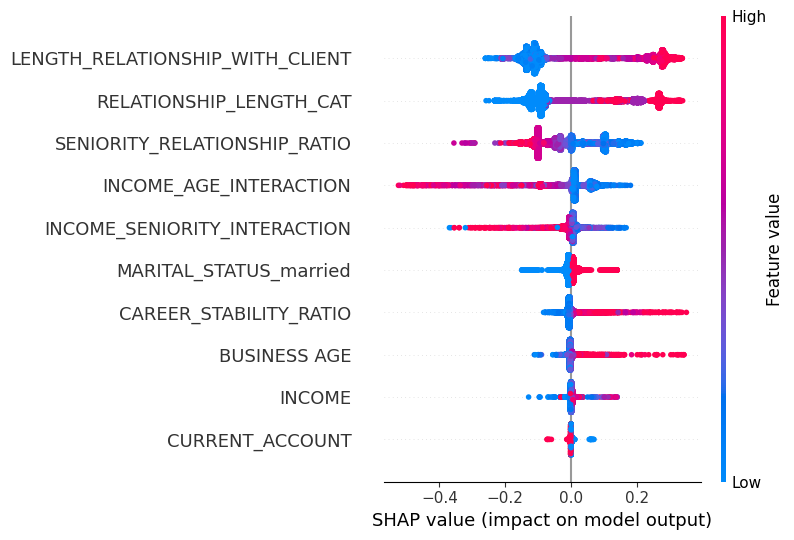

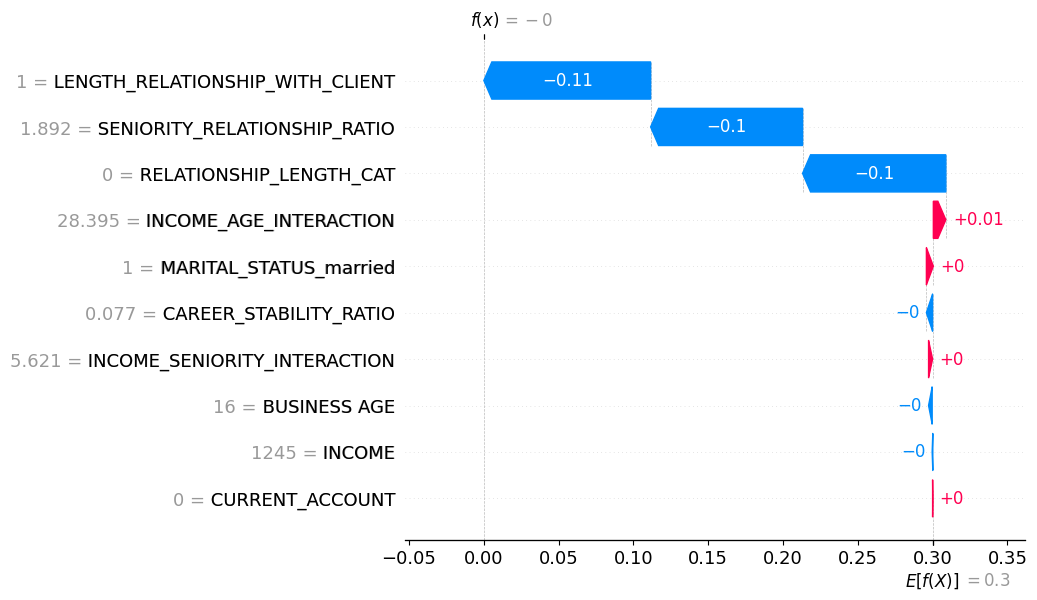

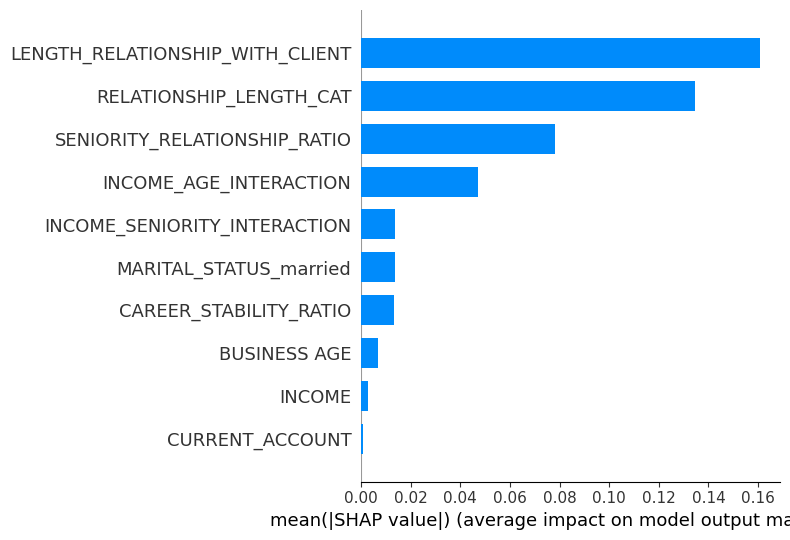

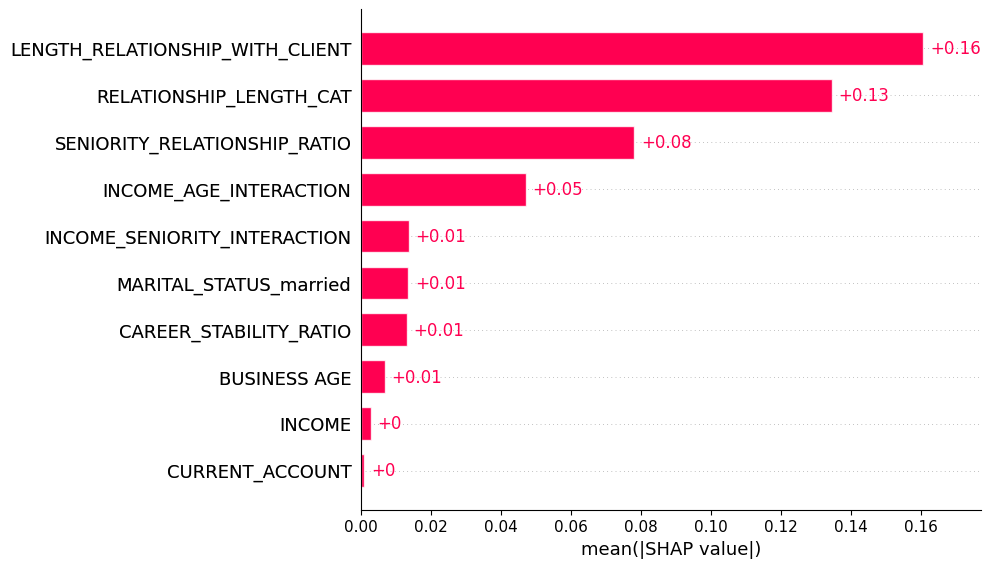

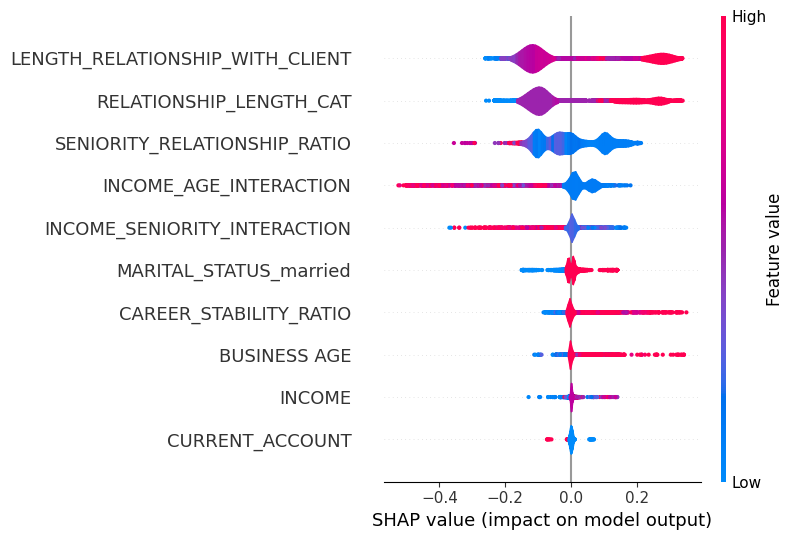

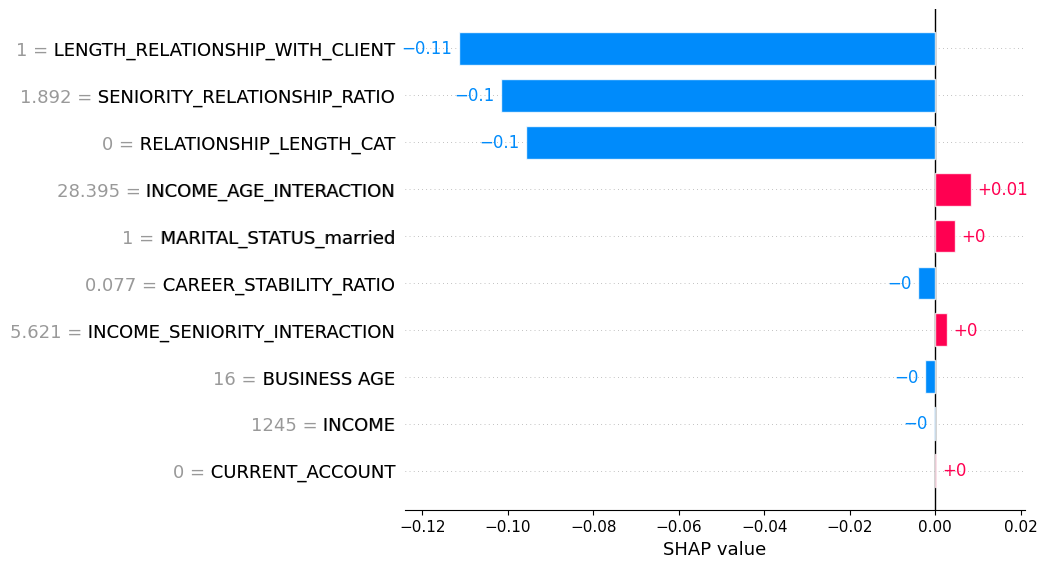

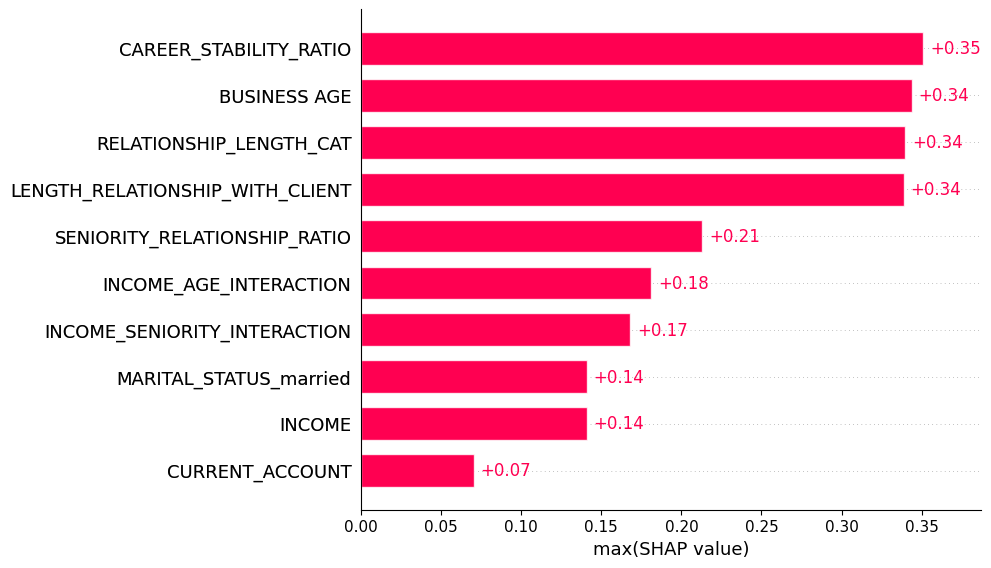

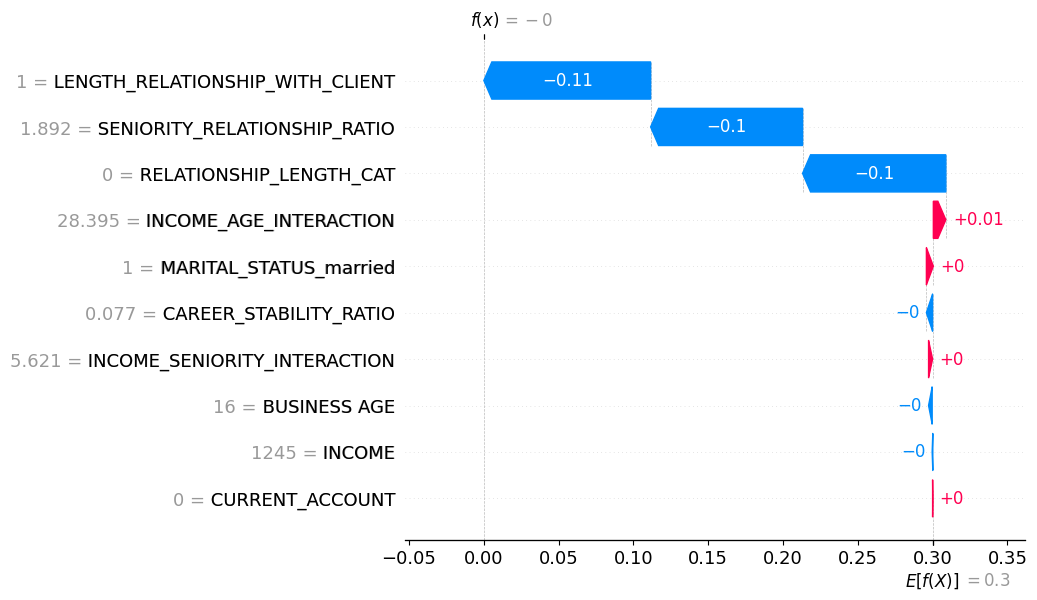

In [7]:
model = GaussianNB()   
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

explainer = shap.Explainer(model.predict, X_train)
    
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# freature importance    
shap.summary_plot(shap_values, X_train, plot_type="bar")

shap.plots.bar(shap_values)
shap.summary_plot(shap_values, plot_type='violin')
shap.plots.bar(shap_values[0])
shap.plots.bar(shap_values.max(axis=0))

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[0])


shap.plots.force(shap_values[0])

shap.plots.heatmap(shap_values)

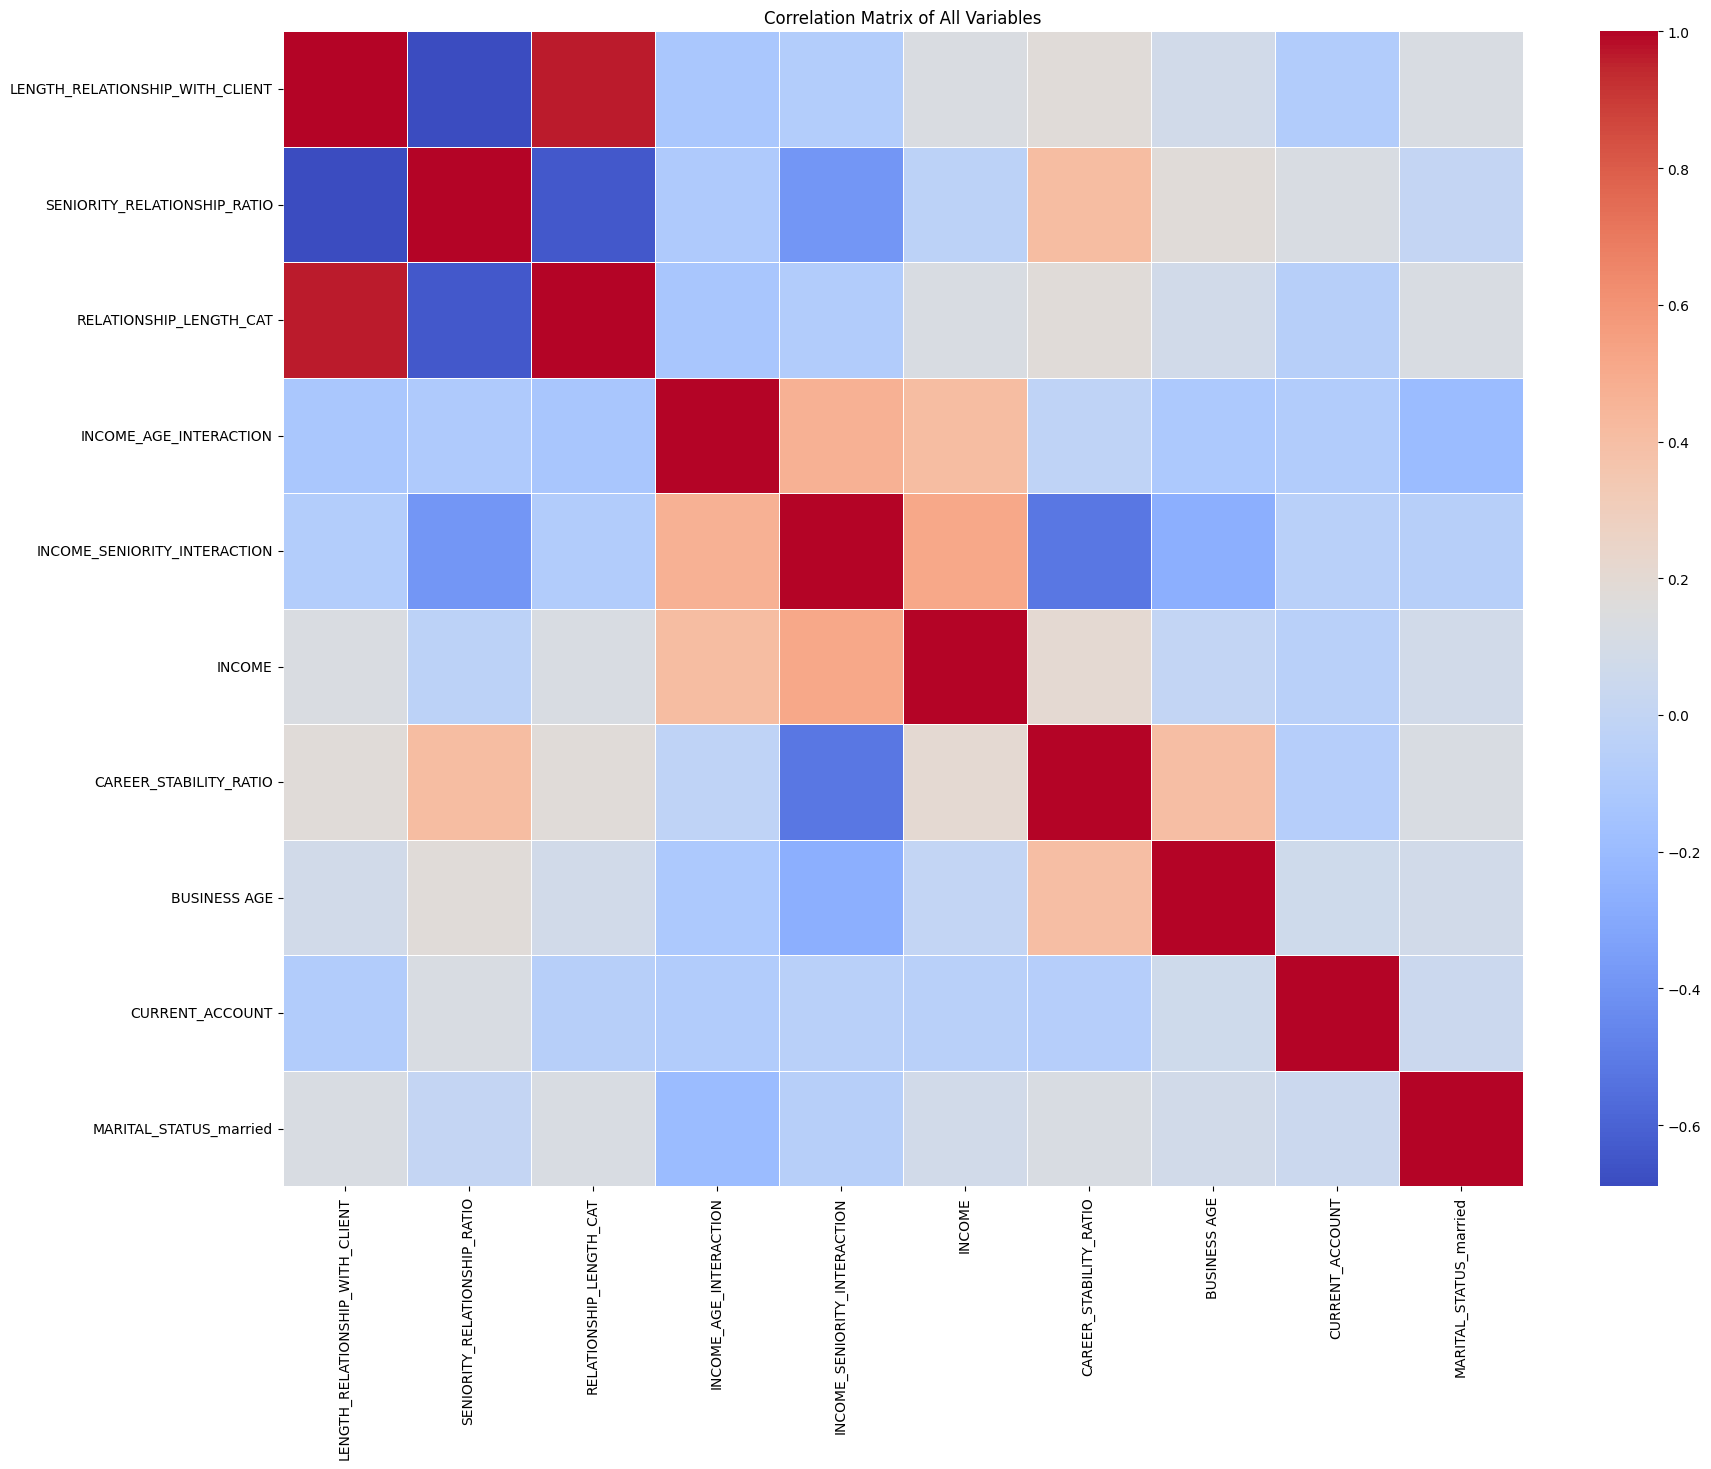

In [5]:
correlation_matrix = X_train.corr()


# Setting the size of the figure

plt.figure(figsize=(20, 15))


# Generating a heatmap to visualize the correlation matrix

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=.5)


# Setting the title of the heatmap

plt.title('Correlation Matrix of All Variables')


# Showing the heatmap

plt.show()

Recall: 0,91 and Gini: 0,72, Accuracy: 0,86

### XGBOOST

In [20]:

# Initialize XGBoost Classifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Simplified parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': np.arange(3, 8, 2),  # Simpler range
    'min_child_weight': np.arange(1, 6, 2),
    'learning_rate': np.linspace(0.01, 0.2, 4),
    'subsample': np.linspace(0.6, 1.0, 3),
    'colsample_bytree': np.linspace(0.6, 1.0, 3)
}

# Setup RandomizedSearchCV with fewer iterations and CV folds for quicker execution
grid_search = GridSearchCV(estimator=xgb, param_grid=param_dist, scoring='balanced_accuracy', cv=3, verbose=2, n_jobs=-1, )

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score from the Randomized Search
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
best_params_grid, best_score_grid

Fitting 3 folds for each of 324 candidates, totalling 972 fits


({'colsample_bytree': 0.8,
  'learning_rate': 0.1366666666666667,
  'max_depth': 7,
  'min_child_weight': 1,
  'subsample': 0.8},
 0.7555101683781759)

In [21]:
# Parametry dla modelu XGBoost

params = {

    'subsample': 0.8,

    'min_child_weight': 1,

    'max_depth': 7,

    'learning_rate': 0.1366666666666667,

    'colsample_bytree': 0.8,

    'use_label_encoder': False,  # Aby uniknąć ostrzeżeń

    'eval_metric': 'logloss'  # Metryka do oceny podczas trenowania

}



# Utworzenie i trenowanie modelu

xgb_model = XGBClassifier(**params)

xgb_model.fit(X_train, y_train)



# Predict on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracies
accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)

recall_xgb = recall_score(y_test, y_pred_xgb)

gini_xgb = 2 * roc_auc_score(y_test, y_pred_xgb) - 1



accuracy_xgb, recall_xgb, gini_xgb

(0.7506873470402993, 0.5653923541247485, 0.5013746940805983)

Hyperparameters tuning - Random Forest Model

In [22]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Setting up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [15,20,25],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2]
}

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='balanced_accuracy', cv=3, verbose=2, n_jobs=-1, )
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [300, 400, 500]},
             scoring='balanced_accuracy', verbose=2)

In [23]:
# Best parameters and best score from the Randomized Search
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
best_params_grid, best_score_grid

({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.7575108060316113)

In [24]:
# Parametry dla modelu Random Forest

params = {

    'max_depth': 20,
    
  'min_samples_leaf': 1,
    
  'min_samples_split': 2,
    
  'n_estimators': 300

}



# Utworzenie i trenowanie modelu

rfc_model = RandomForestClassifier(**params)

rfc_model.fit(X_train, y_train)


# Predict on the testing set
y_pred_rfc = rfc_model.predict(X_test)

# Calculate accuracies
accuracy_rfc = balanced_accuracy_score(y_test, y_pred_rfc)

recall_rfc = recall_score(y_test, y_pred_rfc)

gini_rfc = 2 * roc_auc_score(y_test, y_pred_rfc) - 1



accuracy_rfc, recall_rfc, gini_rfc

(0.7722049737719918, 0.5995975855130785, 0.5444099475439839)